## CNN with TensorFlow Keras

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
%matplotlib inline

## Generate Data

In [3]:
train_path = "cats_vs_dogs/train/"
test_path = "cats_vs_dogs/test/"
valid_path = "cats_vs_dogs/valid/"

In [4]:
train_batches = ImageDataGenerator(
    preprocessing_function=keras.applications.vgg16.preprocess_input
).flow_from_directory(directory=train_path, target_size=(224,224), classes=["Cat", "Dog"], batch_size=10)

test_batches = ImageDataGenerator(
    preprocessing_function=keras.applications.vgg16.preprocess_input
).flow_from_directory(directory=test_path, target_size=(224,224), classes=["Cat", "Dog"], batch_size=10, shuffle=False)


valid_batches = ImageDataGenerator(
    preprocessing_function=keras.applications.vgg16.preprocess_input
).flow_from_directory(directory=valid_path, target_size=(224,224), classes=["Cat", "Dog"], batch_size=10)

Found 25000 images belonging to 2 classes.
Found 42 images belonging to 2 classes.
Found 25000 images belonging to 2 classes.


In [5]:
imgs, labels = next(train_batches)

In [6]:
# this function will plot images in form of a grid with 1 row and 10 columns
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

## Menampilkan Prediksi dan Gambar

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

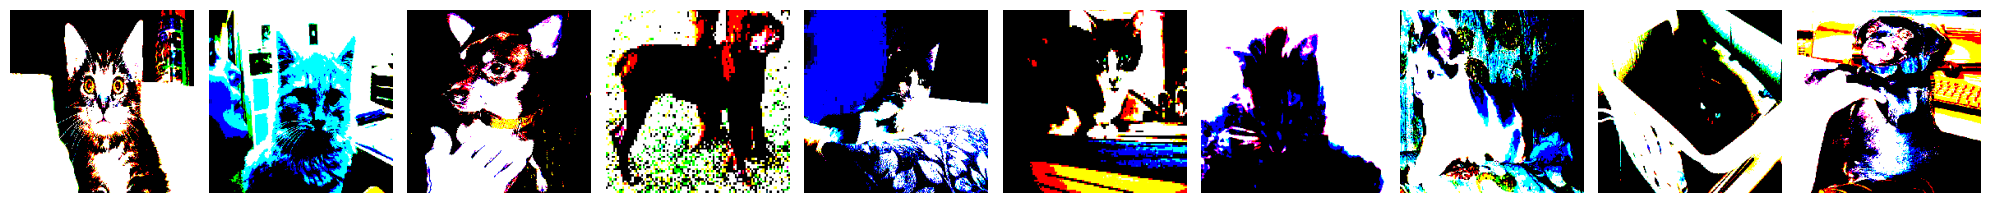

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [7]:
plotImages(imgs)
print(labels)